# **A basic LSTM-based model with trainable embeddings initialized randomly.**

# **1. Importing Required Libraries**

This section loads the necessary libraries for preprocessing, model building, and evaluation.

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,Input, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# **2. Dataset Preparation**

This section loads the IMDB dataset, restricts the vocabulary size, and pads sequences for uniform input length.

In [2]:
max_features = 10000
maxlen = 500

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [5]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [6]:
print(x_train.shape)
print(x_test.shape)

(25000, 500)
(25000, 500)


# **3. Model Definition - Version 1**

A simple LSTM model with randomly initialized embeddings and dropout regularization.

**Input Layer:** Accepts integer-encoded sequences of fixed length.

**Embedding Layer:** Creates dense vector representations (initialized randomly).

**Dropout Layers:** Reduce overfitting by randomly deactivating neurons during training.

**LSTM Layer:** Captures sequential patterns in text.

**Dense Output Layer:** A single neuron with a sigmoid activation for binary classification.


In [7]:
embedding_dim = 32
lstm_units = 32

In [8]:
def My_model(max_features,embedding_dim,maxlen):
    input_layer = Input(shape=(maxlen,), dtype='int32')
    embedding_layer = Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen)(input_layer)
    dropout_layer = Dropout(0.2)(embedding_layer)
    lstm_layer = LSTM(units=lstm_units, return_sequences=False,kernel_regularizer=l2(0.01))(dropout_layer)
    dropout_layer_2 = Dropout(0.2)(lstm_layer)
    output_layer = Dense(units=1, activation='sigmoid',kernel_regularizer=l2(0.01))(dropout_layer_2)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

In [9]:
model = My_model(max_features,embedding_dim,maxlen)
model.summary()

c:\Users\Wasseem\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,353 (1.25 MB)

 Trainable params: 328,353 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

# **4. Model Training and Evaluation - Version 1**

## **Loss Function:**
binary_crossentropy measures the difference between predicted and true labels for binary classification.

## **Optimizer:**
rmsprop optimizes weights during training.

## **Callbacks:**
### **ModelCheckpoint:**
Saves the best model based on validation accuracy.

### **ReduceLROnPlateau:**
Dynamically reduces the learning rate when validation loss plateaus.

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint('best_model_6.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.00001, verbose=1)

In [10]:
batch_size = 32
epochs = 15

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    verbose=1,
    validation_split = 0.2,
    batch_size=batch_size,
    callbacks=[checkpoint,reduce_lr]
)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5392 - loss: 0.8165
Epoch 1: val_accuracy improved from -inf to 0.69280, saving model to best_model_6.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 84ms/step - accuracy: 0.5393 - loss: 0.8163 - val_accuracy: 0.6928 - val_loss: 0.6066 - learning_rate: 0.0010
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8103 - loss: 0.4843
Epoch 2: val_accuracy improved from 0.69280 to 0.86080, saving model to best_model_6.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.8103 - loss: 0.4843 - val_accuracy: 0.8608 - val_loss: 0.4007 - learning_rate: 0.0010
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8727 - loss: 0.3768
Epoch 3: val_accuracy improved from 0.86080 to 0.87580, saving model to best_model_6.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.8727 - loss: 0.3768 - val_accuracy: 0.8758 - val_loss: 0.3512 - learning_rate: 0.0010
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 

# **5. Visualization of Metrics - Version 1**

**Training Accuracy/Loss:** Tracks performance on the training set.

**Validation Accuracy/Loss:** Tracks generalization performance on unseen data.


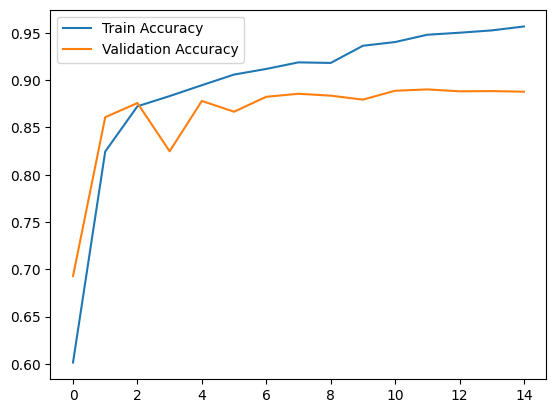

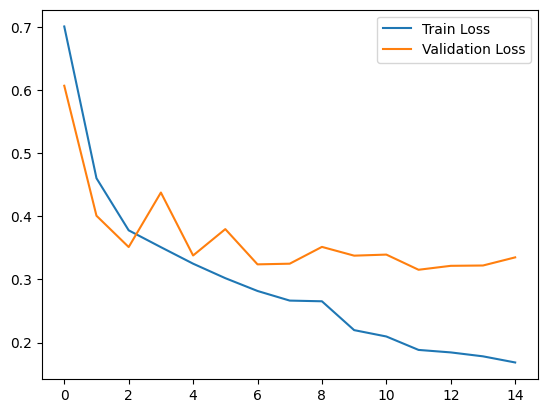

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# **6. Evaluating the model using test set - Version 1**

In [ ]:
# Evaluate the model
print("Evaluating model...")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Evaluating model...
Test Loss: 0.3575
Test Accuracy: 0.8789


In [ ]:
sample = x_test[1:2]
prediction = model.predict(sample)
print(f"Predicted Sentiment: {'Positive' if prediction[0][0] > 0.5 else 'Negative'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Predicted Sentiment: Positive


In [ ]:
print(y_test[1:2])
print(f"Real Sentiment: {'Positive' if y_test[1:2] > 0.5 else 'Negative'}")

[1]
Real Sentiment: Positive
